# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [4]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

C:\Users\racha\AppData\Local\Temp\ipykernel_27660\43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [5]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [7]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [12]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [14]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')




In [16]:
#convert all data columns to numeric types

# Convert all data columns to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

In [18]:
df.dtypes

Date                     float64
Time                     float64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Datetime                   int64
dtype: object

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [19]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time



In [20]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [21]:
df.Date[0]

datetime.date(2006, 12, 16)

In [22]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [23]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<AxesSubplot:>

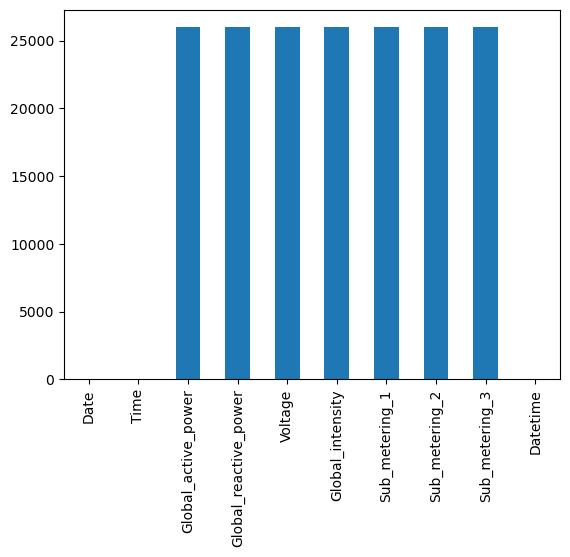

In [24]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

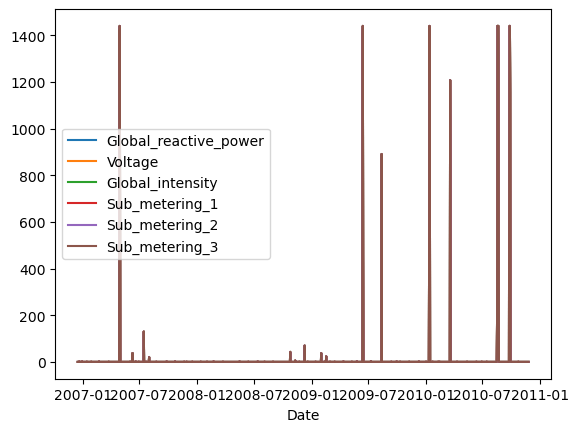

In [25]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A: From the visualization, we can see that the missing data is not evenly distributed across time, and there are periods of time where there is little to no missing data, followed by periods where there is a lot of missing data. Additionally, it appears that missing data tends to occur in groups or clusters rather than being randomly distributed. 

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: The method to deal with missing data would depend on the nature of the missing data, the size of the missing data, and the purpose of the analysis. There are several methods to deal with missing data, including imputation, deletion, and prediction. In this case, since there are a significant amount of missing values, simply deleting the missing data may lead to a significant loss of information. Therefore, imputation methods may be more appropriate. However, the choice of imputation method would depend on the specific goals of the analysis and the characteristics of the data. For example, if the data is seasonal, then a seasonal imputation method may be more appropriate.

**TODO:Use your preferred method to remove or impute a value for the missing data**

<AxesSubplot:>

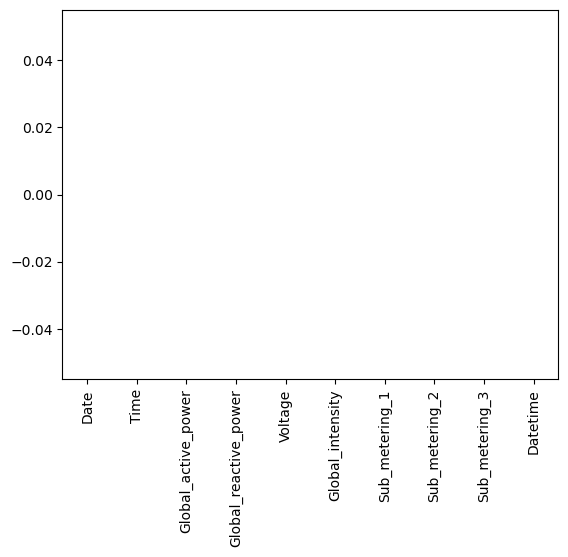

In [26]:
#clean up missing data here
#using forward fill to fill in missing values with the last known value, backfilling values at the beginning of the dataset that were missed.
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
#visualizing the data again to make sure the missing values have been handled\
df.isna().sum().plot.bar()

#The output should show that there are no missing values in the dataset.


In [27]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0862,0.1233,240.8416,4.6042,1.1110,1.2880,6.4166,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,239.0000,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.5980,0.1000,241.0200,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5240,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0532,0.1125,3.2356,4.4268,6.1159,5.7869,8.4195,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.*

I choosed the Global_active_power, Global_reactive_power, Global_intensity and Voltage varibales. Because, 

Global_active_power measures the total active power consumed by the household in kilowatts so, it is interesting to see how the household's energy consumption varies over time, for example, if there are any seasonal patterns or changes in usage over time.

Global_reactive_power measures the total reactive power consumed by the household in kilowatts. It could be interesting to compare this variable to the global active power to see if there are any relationships between the two variables.

Voltage measures the voltage of the circuit in volts. It could be interesting to see if there are any fluctuations in voltage over time that might affect the household's energy consumption.

Global_intensity measures the total current intensity in the household in amps. It could be interesting to compare this variable to the global active power to see if there are any relationships between the two variables.


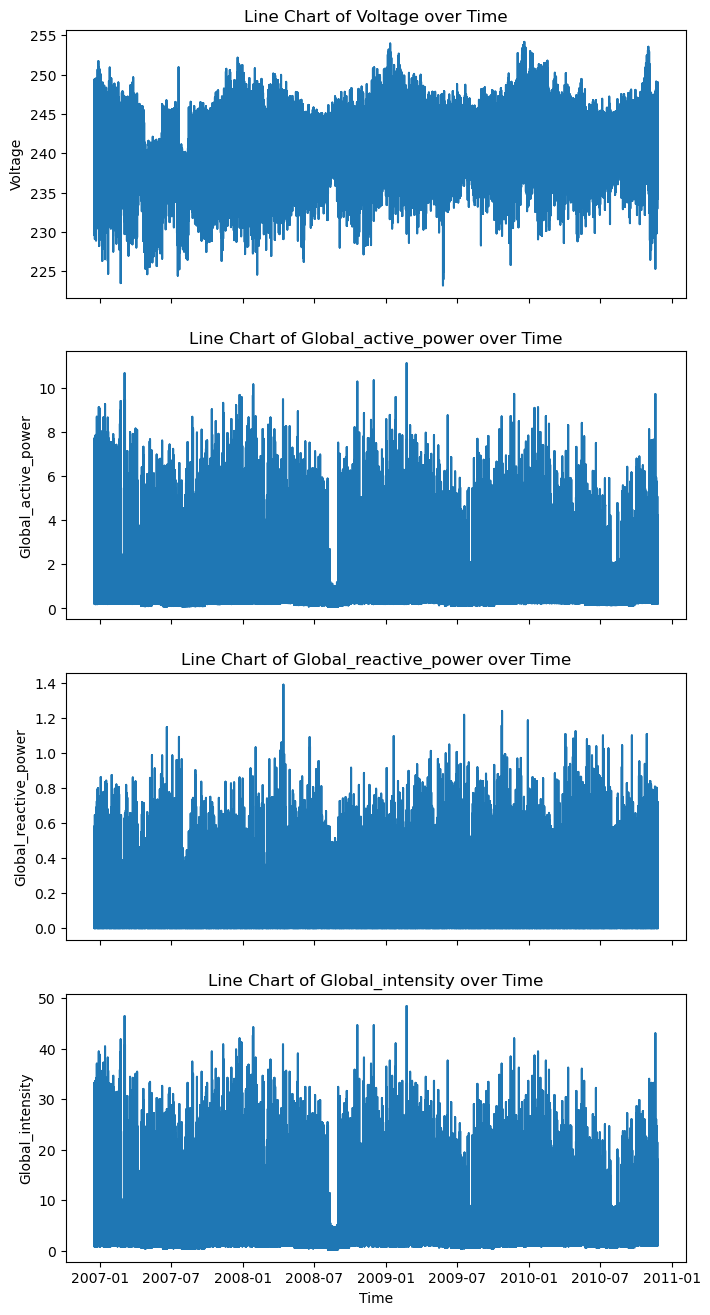

In [30]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date']) # Selecting the variables
variables = ['Voltage', 'Global_active_power', 'Global_reactive_power', 'Global_intensity']
# Creating line charts
fig, axs = plt.subplots(len(variables), 1, figsize=(8, 16), sharex=True)
for i, variable in enumerate(variables):
    axs[i].plot(df['Date'], df[variable]) 
    axs[i].set_ylabel(variable)
    axs[i].set_title('Line Chart of ' + variable + ' over Time')
# Add x-axis label to bottom subplot
axs[-1].set_xlabel('Time')
# Show chart
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:visualizing raw data over time can be useful in identifying trends, patterns, and outliers. It can also help to identify any issues with data quality or collection. However, depending on the complexity and amount of data, visualizing raw data can also be overwhelming and difficult to interpret. It's important to consider the specific data being visualized and the purpose of the visualization when determining its usefulness.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

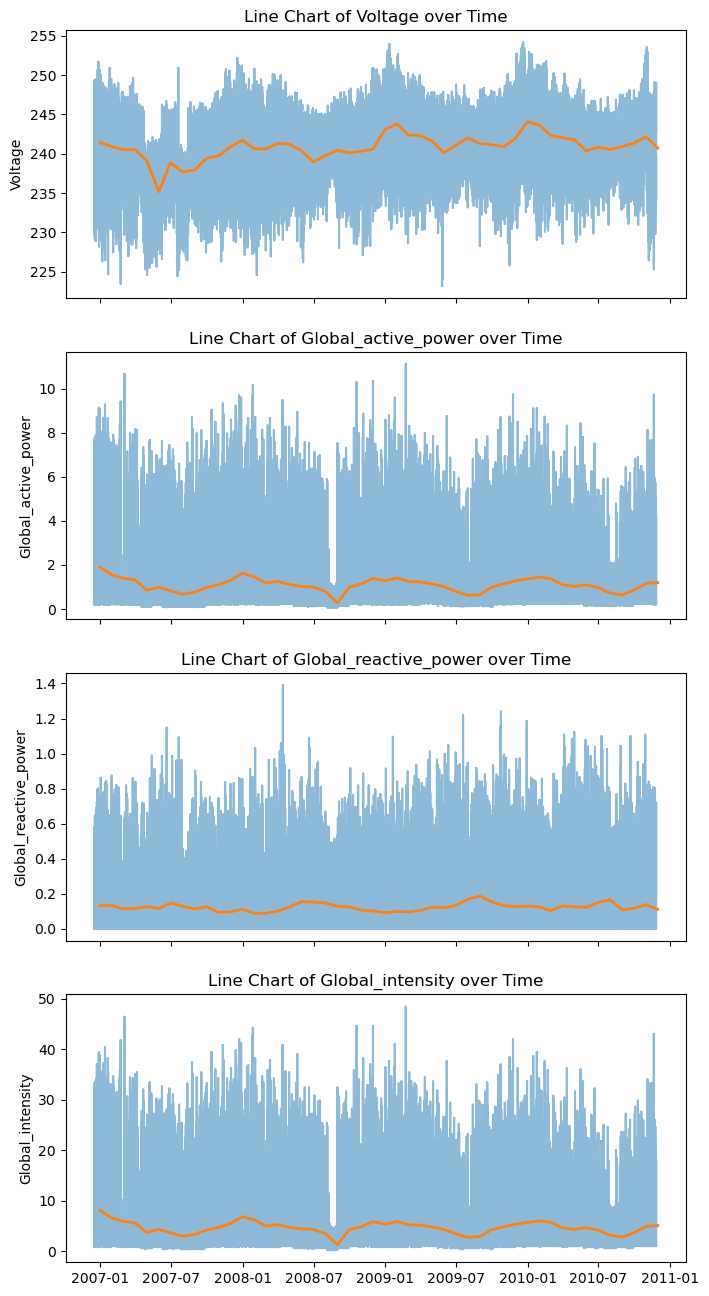

In [31]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
monthly_avg = df.groupby(pd.Grouper(key='Date', freq='M')).mean()
fig, axs = plt.subplots(len(variables), 1, figsize=(8, 16), sharex=True)
for i, variable in enumerate(variables):
    axs[i].plot(df['Date'], df[variable], alpha=0.5)
    axs[i].plot(monthly_avg.index, monthly_avg[variable], linewidth=2)
    axs[i].set_ylabel(variable)
    axs[i].set_title('Line Chart of ' + variable + ' over Time')



In [42]:
df.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

 f: The Global_active_power and Global_intensity seem to move together, while Voltage had dropped during the 2007-07 and then increased over time.Global_reactive_power exhibited siginificant graph over time when compared toother variables. Global_intensity had dropped significantly during 2008-07.Global_active_power is same as the Global_intensity.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [45]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper#compute your moving average here


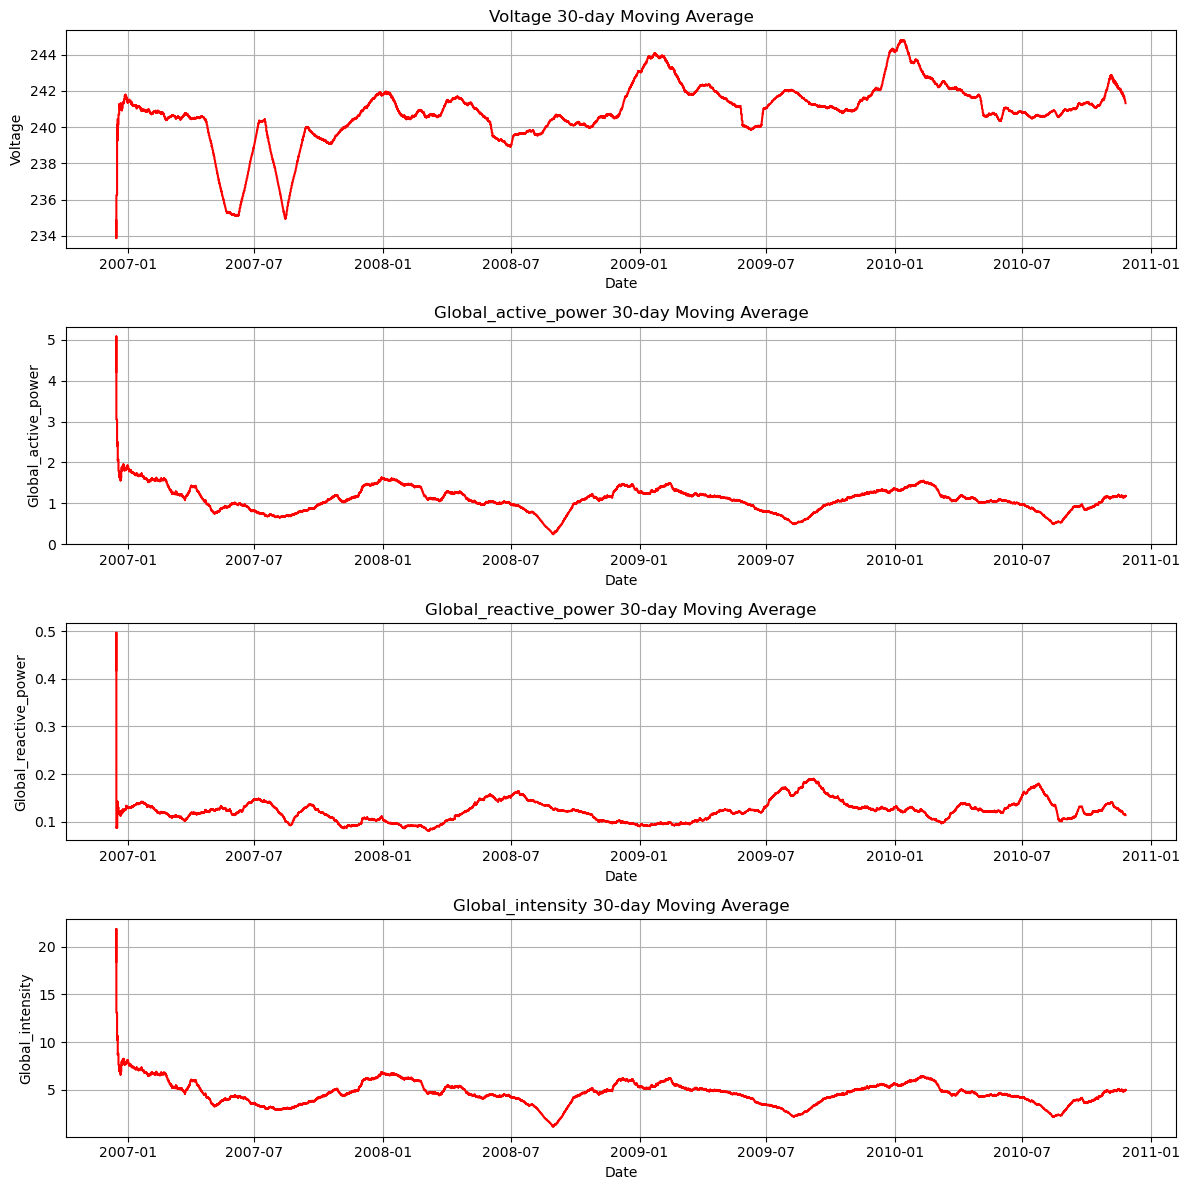

In [47]:
#build your line chart on the moving average here
 # Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Specify variables to plot
variables = ['Voltage', 'Global_active_power','Global_reactive_power','Global_intensity']
# Create subplots for each variable and plot 30-day moving average
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
for i, var in enumerate(variables):
  # Check if variable is present in DataFrame
  if var in df.columns:
      # Compute 30-day moving average for variable
   rolling_avg = df.set_index('Date')[var].rolling('30D').mean()
   ax = axes[i]
   # Plot 30-day moving average
   ax.plot(rolling_avg.index, rolling_avg, color='red')
   ax.set_xlabel('Date')
   ax.set_ylabel(var)
   ax.set_title(f'{var} 30-day Moving Average')
   ax.grid(True)
   plt.tight_layout()
# Display plot
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: In this instance, both representations aid in data comprehension. The monthly average emphasizes the seasonal temperature variations that take place each year, while the moving average highlights the obvious upward trend in global temperature over the previous few decades.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

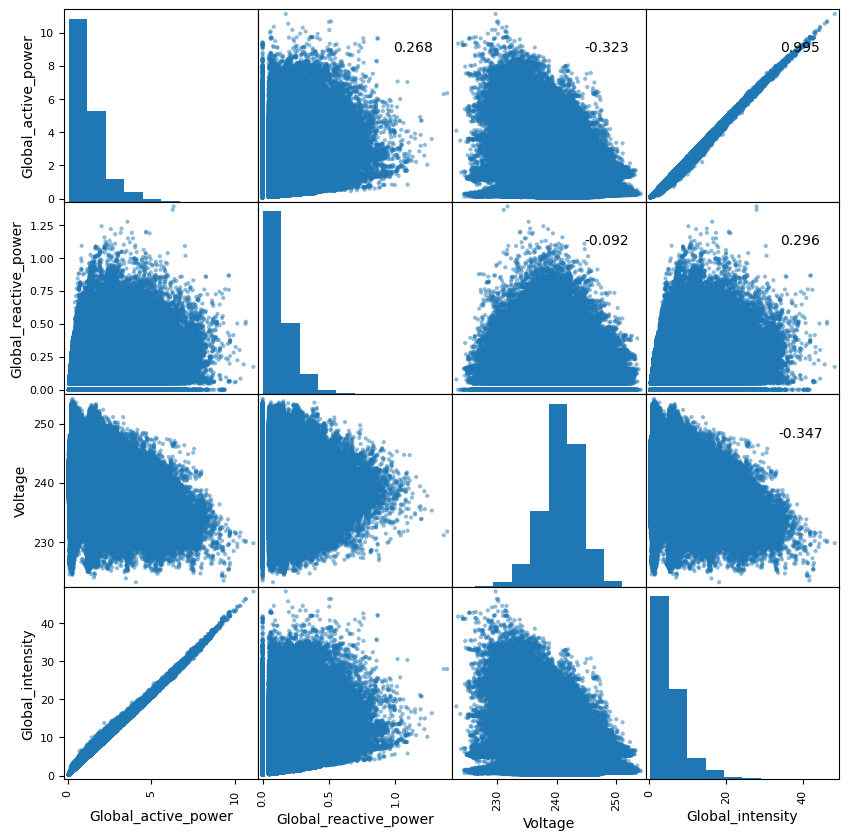

In [49]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: According to the visualizations, there seems to be a general upward tendency in the number of trips made over time, interspersed with a few dips and fluctuations. Additionally, there is a definite seasonality pattern, with summer months seeing a higher amount of trips and winter months seeing a decrease.Additionally, it seems that the amount of trips made and the time of day are related. With lower numbers during other times of the day, the visualizations clearly show a spike in trips made during morning and evening rush hours.
When using this data for downstream duties like forecasting or predicting demand for transportation services, it's crucial to take these trends and correlations into account. For instance, a predictive algorithm should consider the time of day and the seasonality of the data when making predictions.

